In [13]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

# Illustrative example

In this notebook the Illustrative example of paper "Point-in-time and extreme-value probability simulation technique for engineering design" R. Mínguez et al. (2012) is used to check the new Extreme Correction technique.

The example generates an ARMA process to generate the historical data and then correct a new simulated data.

## ARMA 

The ARMA(1,1) is generated with parameters $\phi_1 = -0.8$, $\theta_1 = 0.3$ and variance $\sigma_{\epsilon}^2 = 1$.

In [14]:
# Define ARMA parameters
phi_1 = -0.8
theta_1 = 0.3
sigma_eps = 1.0

In [39]:
sigma_z = np.sqrt((1+theta_1**2-2*phi_1*theta_1)/(1-phi_1**2)*sigma_eps**2)
sigma_z

2.0883273476902784

In [ ]:
np.random.seed(42)  # For reproducibility

ar = np.array([1, phi_1])      
ma = np.array([1, theta_1])

n_hist = int(100*24*365.25)
# Define the ARMA process
arma_process = ArmaProcess(ar, ma)

hist_sample = arma_process.generate_sample(nsample=n_hist, scale=sigma_eps)

In [49]:
hist_sample

array([ 0.49671415,  0.40812127,  0.93270626, ..., -1.07623159,
       -0.69985485, -0.48101119])

In [50]:
ecdf_hist = np.arange(1,n_hist+1)/(n_hist+1)
T_ecdf_hist = 1/(1-ecdf_hist)/365.25/24

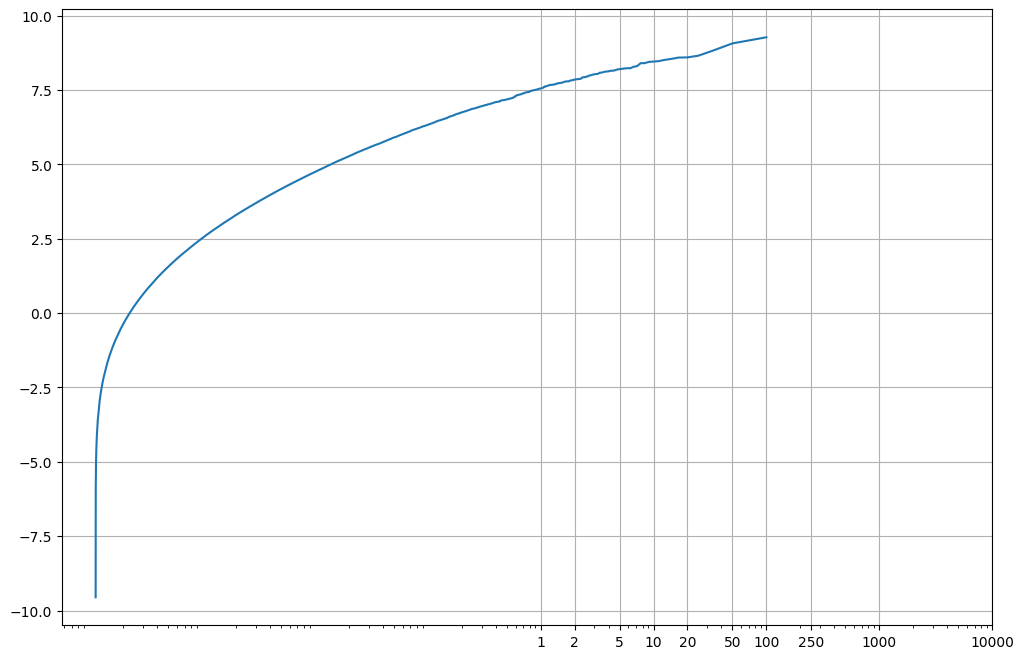

In [51]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.semilogx(T_ecdf_hist, np.sort(hist_sample))
ax.set_xscale('log')
ax.set_xticks([1, 2, 5, 10, 20, 50, 100, 250, 1000, 10000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.grid()
plt.show()

## Fit Normal distribution to Point-in-time and GEV to annual maxima

In [52]:
import scipy.stats as stats

params_pit = stats.norm.fit(hist_sample)

In [53]:
params_pit

(-0.004415753476777863, 2.0877039093020984)

## Fit ARMA(1,1) to Point-in-time data and GEV to Annual maxima

In [ ]:
import statsmodels.tsa.api as tsa

arma_model = tsa.ARMA(hist_sample, order=(1, 1)).fit()